In [1]:
#import libraries
from os import path

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 12,8

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
import xgboost as xgb


#Common Model Helpers
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, balanced_accuracy_score, f1_score

#stacking
from sklearn.model_selection import KFold

#hyperparameter tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

import ast

import warnings
warnings.filterwarnings('ignore')

#set directory
DATA_DIR = '/Users/Alastair/Desktop/python/kaggle/Spaceship Titanic'

In [2]:
#load data
train = pd.read_csv(path.join(DATA_DIR,"train_wrangled.csv"))
test = pd.read_csv(path.join(DATA_DIR,"test_wrangled.csv"))

#combine test and train dfs for easy manipulation
combine = [train, test]

In [3]:
# preview the data
train.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,SpaBin,VRDeckBin,places_spent,total_spend_log,RoomServiceLog,FoodCourtLog,ShoppingMallLog,SpaLog,VRDeckLog,AgeBin
7538,8058_01,1,0,F/1664/P,0,29.0,0.0,12.0,2.0,0.0,...,1.0,1.0,4.0,3,1,0,0,2,3,2
4890,5211_01,1,0,E/332/S,0,24.0,0.0,666.0,938.0,1.0,...,0.0,0.0,3.0,3,2,2,0,0,0,1
2721,2919_02,2,0,F/555/S,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
5703,6039_02,1,0,F/1148/S,0,32.0,0.0,3.0,0.0,0.0,...,0.0,1.0,2.0,2,0,0,0,0,2,2
3065,3308_01,1,0,F/690/P,1,14.0,0.0,0.0,43.0,504.0,...,1.0,0.0,3.0,2,0,1,2,2,0,0
4226,4498_06,1,0,G/734/S,0,15.0,0.0,0.0,893.0,0.0,...,0.0,0.0,1.0,2,0,2,0,0,0,0
6839,7226_01,2,0,E/481/S,0,20.0,0.0,3191.0,0.0,211.0,...,1.0,1.0,4.0,3,3,0,2,1,2,1
1632,1728_01,1,0,G/280/P,0,38.0,0.0,553.0,0.0,0.0,...,1.0,1.0,3.0,2,2,0,0,1,2,2
285,0314_01,1,0,G/51/P,2,26.0,0.0,386.0,0.0,74.0,...,0.0,1.0,3.0,3,2,0,1,0,3,1
2385,2560_03,1,0,G/412/P,0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


### Labelling

Assigning new variables to help with ML and graphing

In [4]:
#define y variable aka target/outcome
Target = ['Transported']

#define x variables for original features aka feature selection
x = ['HomePlanet','CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name_length', 'total_spend', 'group','deck']
xy = Target + x
print('Original X Y: ', xy, '\n')


#define x variables for original w/bin features to remove continuous variables
#with binary spend colums
#x_bin = ['HomePlanet','CryoSleep', 'Destination', 'AgeBin', 'VIP', 'RoomServiceBin', 'FoodCourtBin', 'ShoppingMallBin', 'SpaBin', 'VRDeckBin', 'has_spent', 'is_alone','deck'] #pretty name/values for charts
#with Log10 spend columns
x_bin = ['HomePlanet','CryoSleep', 'Destination', 'AgeBin', 'RoomServiceLog', 'FoodCourtLog', 'ShoppingMallLog', 'SpaLog', 'VRDeckLog', 'total_spend_log','deck'] #pretty name/values for charts
xy_bin =  Target + x_bin
print('Bin X Y: ', xy_bin, '\n')

#setting bin variables to int
for x in x_bin:
    train[x] = train[x].astype(int)
    test[x] = test[x].astype(int)

Original X Y:  ['Transported', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name_length', 'total_spend', 'group', 'deck'] 

Bin X Y:  ['Transported', 'HomePlanet', 'CryoSleep', 'Destination', 'AgeBin', 'RoomServiceLog', 'FoodCourtLog', 'ShoppingMallLog', 'SpaLog', 'VRDeckLog', 'total_spend_log', 'deck'] 



# Model Data

In [5]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    #xgboost: 
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = train[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation
    cv_results = model_selection.cross_validate(alg, train[x_bin], train[Target], cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions
    alg.fit(train[x_bin], train[Target])
    MLA_predict[MLA_name] = alg.predict(train[x_bin])
    
    row_index+=1

    
#print and sort table:
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#save predictions
MLA_predict.to_csv('MLA_predict.csv')

[20:34:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:34:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:34:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:34:26] WARNING: /Users/runner/miniforge3/cond

Text(0, 0.5, 'Algorithm')

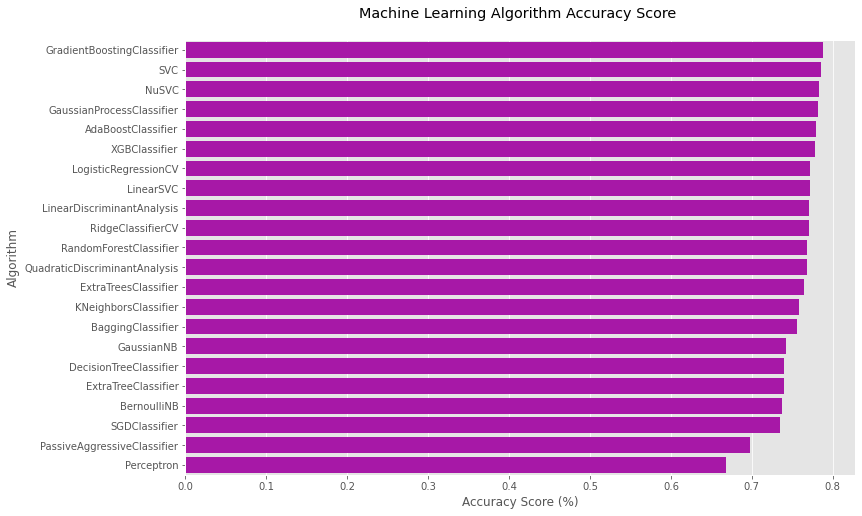

In [6]:
#barplot 
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot:
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

# Validate, Implement and Tune Data Model

## Gradient Boosting Classifier

I am now going to try and improve the `GradientBoostingClassifier` model since this was the best performing model. I will do this by tunign the hyper parameters. To do this I will be using `GridSearchCV` to run the model with each hyperparameter setting in the grid combined with each other setting

### Hyper Parameter Tuning

In [7]:
#initial investigation by plotting individual hyperparameters
#GradientBoostingClassifier 

#split training data into training and validation set
X_training, X_val, y_training, y_val = train_test_split(train[x_bin], train[Target], test_size=0.3, random_state=0)

#function to explore individual hyperparameters so that final param grid can be more finely tuned to save computation time
def explore_GBC_hyperparameters(hyperparameter, hyperparameter_values, scoring='accuracy'):

    param_grid = [{hyperparameter: hyperparameter_value} for hyperparameter_value in hyperparameter_values]
    score_training_data = []
    score_val_data = []

    for i, _ in enumerate(hyperparameter_values):
        clf = GradientBoostingClassifier(random_state=0, **param_grid[i])
        clf.fit(X_training, y_training)
        scorer = metrics.get_scorer(scoring)
        score_training_data.append(scorer(clf, X_training, y_training))
        score_val_data.append(scorer(clf, X_val, y_val))

    plt.plot(hyperparameter_values, score_training_data)
    plt.plot(hyperparameter_values, score_val_data)
    plt.legend(['Training Data', 'Validation Data'])
    plt.xlabel('Hyperparameter Value')
    plt.ylabel('Score')
    plt.show()

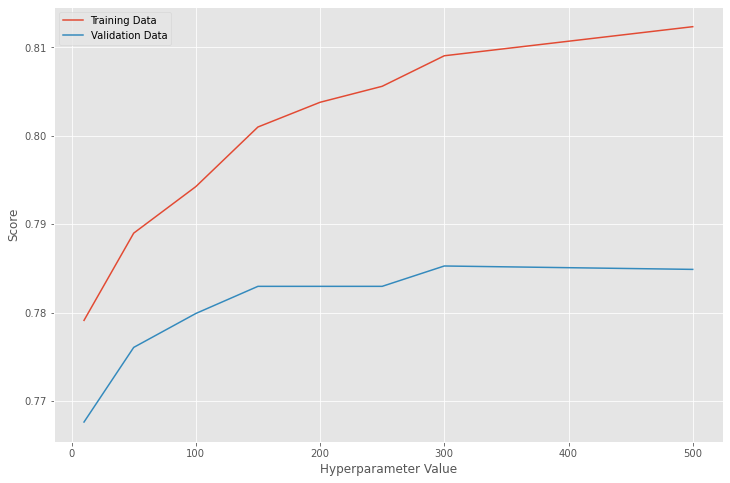

In [8]:
#varying the number of estimators   
explore_GBC_hyperparameters(
    hyperparameter="n_estimators",
    hyperparameter_values = [10, 50, 100, 150, 200, 250, 300, 500]
)

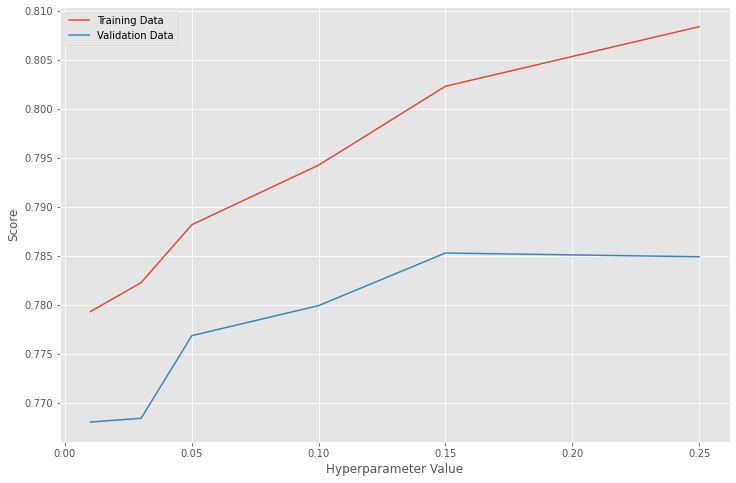

In [9]:
#varying the learning rate   
explore_GBC_hyperparameters(
    hyperparameter="learning_rate",
    hyperparameter_values = [.01, .03, .05, .1, .15, .25]
)

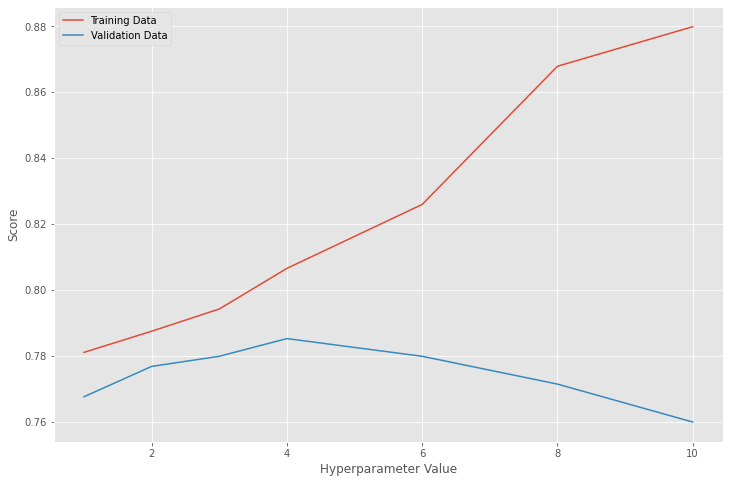

In [10]:
#varying the grid depth
explore_GBC_hyperparameters(
    hyperparameter="max_depth",
    hyperparameter_values = [1, 2, 3, 4, 6, 8, 10]
)

In [11]:
#create lists of values for hyperparameters to tune using param_grid
grid_n_estimator = [ 50, 100, 150, 200]
grid_learn = [ .05, .1, .15]
grid_max_depth = [ 2, 3, 4, 5]
grid_seed = [0]

#split dataset in cross-validation with this splitter class:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#base model
GBC = ensemble.GradientBoostingClassifier()
base_results = model_selection.cross_validate(GBC, train[x_bin], train[Target], cv  = cv_split, return_train_score=True)
GBC.fit(train[x_bin], train[Target])

print('BEFORE GBC Parameters: ', GBC.get_params())
print("BEFORE GBC Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE GBC Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE GBC Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)


#tune hyper-parameters:
param_grid = {'loss': ['deviance', 'exponential'], #default=’deviance’
              'learning_rate': grid_learn, #default=0.1  with a runtime of 264.45 seconds.
              'n_estimators': grid_n_estimator, #default=100 
              'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
              'max_depth': grid_max_depth, #default=3   
              'random_state': grid_seed
           }


#choose best model with grid_search: 
tune_model = model_selection.GridSearchCV(GBC, param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score=True)
tune_model.fit(train[x_bin], train[Target])

print('AFTER GBC Parameters: ', tune_model.best_params_)
print("AFTER GBC Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print(tune_model.cv_results_['mean_test_score'])
print("AFTER GBC Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER GBC Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE GBC Parameters:  {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
BEFORE GBC Training w/bin score mean: 79.83
BEFORE GBC Test w/bin score mean: 78.83
BEFORE GBC Test w/bin score 3*std: +/- 2.26
----------


KeyboardInterrupt: 

### Tune with feature selection

In [ ]:
#base model
print('BEFORE GBC RFE Training Shape Old: ', train[x_bin].shape) 
print('BEFORE GBC RFE Training Columns Old: ', train[x_bin].columns.values)

print("BEFORE GBC RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE GBC RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE GBC RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)


#feature selection
GBC_rfe = feature_selection.RFECV(GBC, step = 1, scoring = 'accuracy', cv = cv_split)
GBC_rfe.fit(train[x_bin], train[Target])

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: l
X_rfe = train[x_bin].columns.values[GBC_rfe.get_support()]
rfe_results = model_selection.cross_validate(GBC, train[X_rfe], train[Target], cv  = cv_split, return_train_score=True)

#print(dtree_rfe.grid_scores_)
print('AFTER GBC RFE Training Shape New: ', train[X_rfe].shape) 
print('AFTER GBC RFE Training Columns New: ', X_rfe)

print("AFTER GBC RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER GBC RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER GBC RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))
print('-'*10)


#tune rfe model
rfe_tune_model = model_selection.GridSearchCV(GBC, param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score=True)
rfe_tune_model.fit(train[X_rfe], train[Target])

print('AFTER GBC RFE Tuned Parameters: ', rfe_tune_model.best_params_)
print(rfe_tune_model.cv_results_['mean_train_score'])
print("AFTER GBC RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][rfe_tune_model.best_index_]*100)) 
print(rfe_tune_model.cv_results_['mean_test_score'])
print("AFTER GBC RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][rfe_tune_model.best_index_]*100))
print("AFTER GBC RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][rfe_tune_model.best_index_]*100*3))
print('-'*10)

# Submit

In [ ]:
#Best MLA
GBC = ensemble.GradientBoostingClassifier(learning_rate = 0.05, max_depth = 4, n_estimators = 150, random_state = 0, criterion = 'mse', loss = 'exponential')
GBC.fit(train[x_bin], train[Target])

Y_pred = GBC.predict(test[x_bin])

In [ ]:
#Generate Submission File 

Submission = pd.DataFrame({ 'PassengerId': test.PassengerId,'Transported': Y_pred })
Submission.to_csv("submission.csv", index=False)